# TIE2030 Lab Exercise 3

## Question 1

In [1]:
# import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
def text_file():
    text_list = open("C:/Users/ongkw/Desktop/sequences.txt").read().split()

    return text_list

data = text_file()

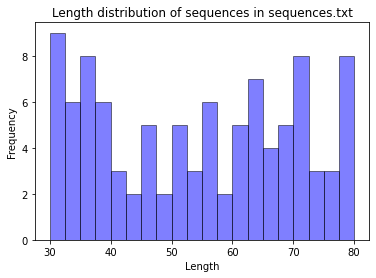

In [3]:
len_seq = []

with open('C:/Users/ongkw/Desktop/seq_length_output.txt', 'w') as f:
    start_time = time.time()
    for i in range(len(data)):
        string_one = ("Sequence " +  str(i) + ": "+ str(data[i]))
        string_two = ("Length of sequence " + str(i) + ": " + str(len(data[i])))
        len_seq.append(len(data[i]))
        f.write(string_one)
        f.write('\n')
        f.write(string_two)
        f.write('\n')
        
    plt.hist(len_seq, bins = 20, density = False, histtype = 'bar',color = 'b', edgecolor = 'k', alpha = 0.5)
    plt.title('Length distribution of sequences in sequences.txt')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()
    
    end_time = time.time()
    time_diff = (end_time-start_time)%60
    time_format = "{:.2f}".format(time_diff)

    string_three = ("Processing Time: " + time_format + " seconds")
    f.write('\n')
    f.write(string_three)


## Question 2

In [10]:
count = 200
total = 0
entries = 0
values = []
count_entries = []
num_of_entries = []
statement = ''

with open('C:/Users/ongkw/Desktop/string_concat_output.txt', 'w') as f:
    for i in range(len(len_seq)):
        if (count > len_seq[i]):
            total += len_seq[i]
            count -= len_seq[i]
            values.append(len_seq[i])
            count_entries.append(i)
            entries += 1
        
        if (count_entries[-1] == len(len_seq) -1):
            statement = ("Finally, start with " + str(values[0]) + ": ")
        elif (count-len_seq[i+1] <= 0):
            if (count_entries[0] == 0):
                statement = ("Starting from " + str(values[0]) + ": ")
            else:
                statement = ("Then, start with " + str(values[0]) + ": ")
            
        while (statement != ''):
            for items in range(len(values)):
                if (items == len(values)-1):
                    statement = statement + str(values[items]) + " = " + str(total) + " (number of entries: " + str(entries) + ", total value: " + str(total) + ", sequences are: "
                else:
                    statement = statement + str(values[items]) + "+"
            for items in range(len(count_entries)):
                if (items == len(values)-1):
                    statement = statement + str(count_entries[items]) + ")"
                else:
                    statement = statement + str(count_entries[items]) + ", "
            f.write(statement)
            f.write('\n')
            
            num_of_entries.append(entries)
            total = 0
            entries = 0
            count = 200
            values = []
            count_entries = []
            statement = ''

In [5]:
with open('C:/Users/ongkw/Desktop/string_concat_output.txt', 'a') as f:
    values,count = np.unique(num_of_entries, return_counts=True)
    #f.write("\n")
    for i in range(len(values)):
        statement = "Number of occurrences of " + str(values[i]) + " entries: " + str(count[i])
        f.write(statement)
        f.write("\n")

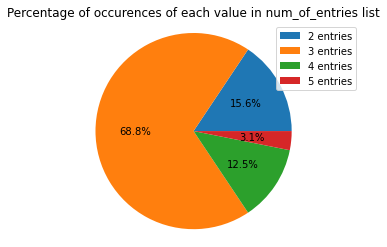

In [6]:
legend = []
fig, ax = plt.subplots()
ax.pie(count, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Percentage of occurences of each value in num_of_entries list')

for items in range(len(values)):
    legend.append(str(values[items]) + " entries")

ax.legend(legend, loc="best")
plt.show()

## Question 3

In [7]:
def coeff_file():
    text_list = open("C:/Users/ongkw/Desktop/coefficients.txt").read().split()

    return text_list
coeff = coeff_file()

In [8]:
equation = []
roots = []
count = 1

with open('C:/Users/ongkw/Desktop/coefficients_output.txt', 'a') as f:
    for i in range(len(coeff)):
        equation.append(coeff[i])
        if (len(equation) % 3 == 0):
            result = math.pow(float(equation[1]),2) - 4*(float(equation[0]))*(float(equation[2]))
            if result >= 0:
                roots.append([float(equation[0]),float(equation[1]),float(equation[2])])
                output = ("Quadratic equation " + str(count) + " with coefficients (" + equation[0] + ", " + equation[1] + ", " + equation[2] + ") has real roots.")
                f.write(output)
                f.write('\n')
            count +=1 
            equation = []

12.89x² + 28.46x + 7.08
15.28x² + 31.54x + 9.64


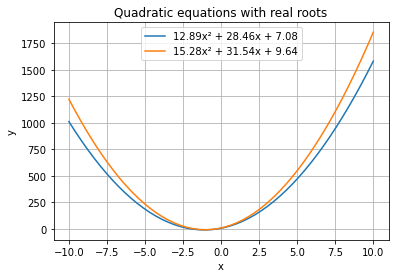

In [9]:
legend  = []
x = np.linspace(-10, 10)
for i in range(2):
    y = roots[i][0]*(x)**2 + roots[i][1]*(x) + roots[i][2]
    string = str(roots[i][0]) + "x² + " + str(roots[i][1]) + "x + " + str(roots[i][2])
    print(string)
    legend.append(string)
    plt.plot(x,y)

plt.legend(legend, loc="upper center")
plt.title("Quadratic equations with real roots")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()